<a id="table"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
* [2. Exploratory Data Analysis(EDA)](#2)
    * [2.1 Univariate analysis of continuous variables](#2.1)
    * [2.2 Univariate analysis of categorical variables](#2.2)
    * [2.3 Plot a general overview of data](#2.3)
    * [2.4 Transform numerical variables into categorical variables](#2.4)
    * [2.5 Relationship between two continuous variables](#2.5)
    * [2.6 Relationship between two categorical variables and one continuous variable](#2.6)
    * [2.7 Relationship between continuous variables and one categorical variable](#2.7)
    * [2.8 How to display correlation between variables](#2.8)
* [3. Non usual plots](#3)
    * [3.1 3D plots](#3.1)
    * [3.2 Geographical plots](#3.2)
* [4. References](#4)

<a id="1.2"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<a id="1.3"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>

In [2]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
tabular=pd.read_csv('../input/tabular-playground-series-mar-2021/train.csv')
titanic=pd.read_csv('../input/titanic/train.csv')
rain=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
hr=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
iris=pd.read_csv('../input/iris/Iris.csv')
health=pd.read_csv('../input/covid19-healthy-diet-dataset/Food_Supply_Quantity_kg_Data.csv')
telecom=pd.read_csv('../input/telecom-users-dataset/telecom_users.csv')
netflix=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
sales=pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
df.drop('id',axis=1,inplace=True)

In [3]:
cont_features= ['age','avg_glucose_level','bmi']
cat_features= ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
target='stroke'

<a id="2"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

<a id="2.1"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate analysis of continuous variables</h3>

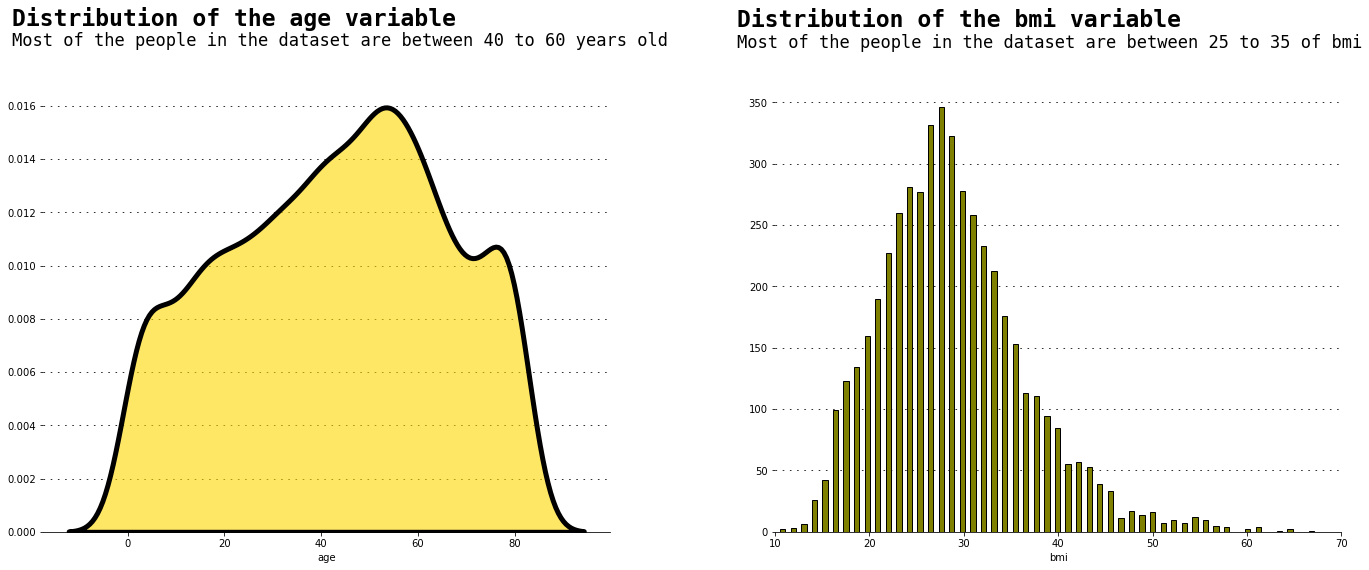

In [4]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,2)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-24,0.019,'Distribution of the age variable',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-24,0.01826,'Most of the people in the dataset are between 40 to 60 years old',fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(6,412,'Distribution of the bmi variable',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[1].text(6,395,'Most of the people in the dataset are between 25 to 35 of bmi',fontsize=17,fontweight='light', fontfamily='monospace')

sns.kdeplot(x=df['age'],ax=ax[0],shade=True, color='gold', alpha=0.6,zorder=3,linewidth=5,edgecolor='black')
sns.histplot(x=df['bmi'],ax=ax[1], color='olive', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
ax[1].set_xlim(10,70)
        
plt.tight_layout()

<a id="2.2"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate analysis of categorical variables</h3>

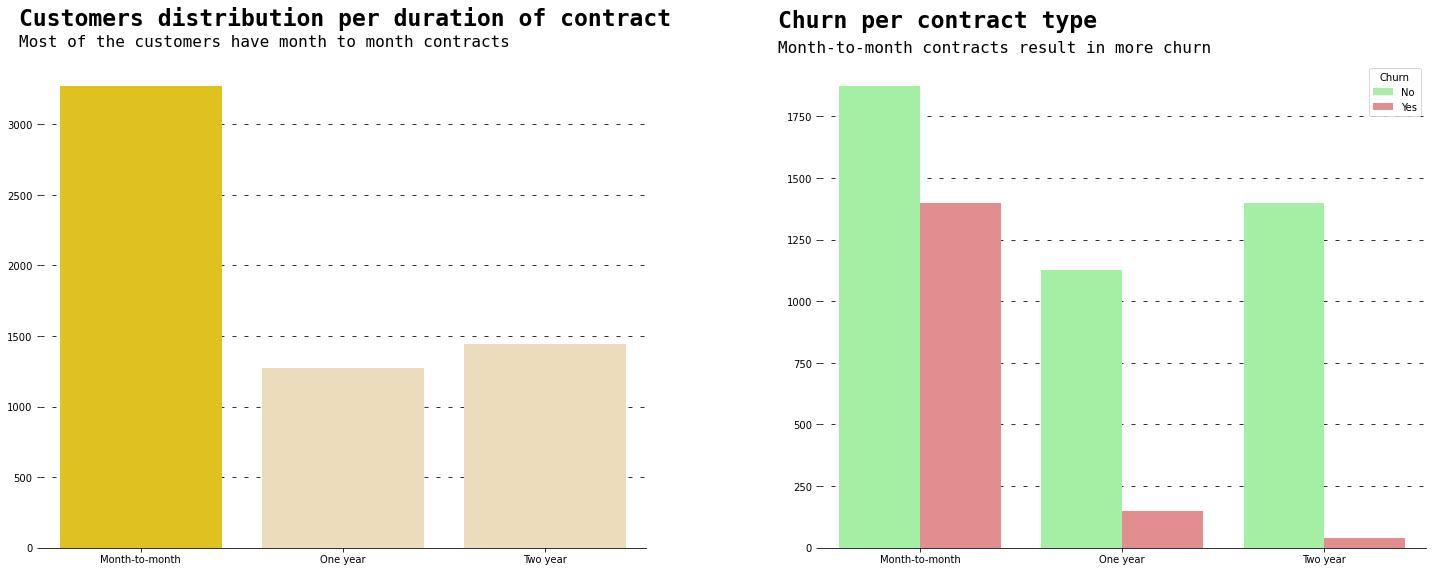

In [5]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[None for _ in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-0.6,3700,"Customers distribution per duration of contract",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-0.6,3550,"Most of the customers have month to month contracts",fontsize=16,fontweight='light', fontfamily='monospace')

ax[1].text(-0.7,2110,"Churn per contract type",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[1].text(-0.7,2010,"Month-to-month contracts result in more churn",fontsize=16,fontweight='light', fontfamily='monospace')

palette1=["wheat" for _ in range(3)]
palette1[0] = "gold"

palette2=["palegreen","lightcoral"]

sns.countplot(data=telecom,x='Contract',ax=ax[0],order=['Month-to-month','One year','Two year'],palette=palette1,zorder=2)
sns.countplot(data=telecom,x='Contract',ax=ax[1],hue='Churn',order=['Month-to-month','One year','Two year'],zorder=2,palette=palette2)

for i in range(2):
    ax[i].grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()

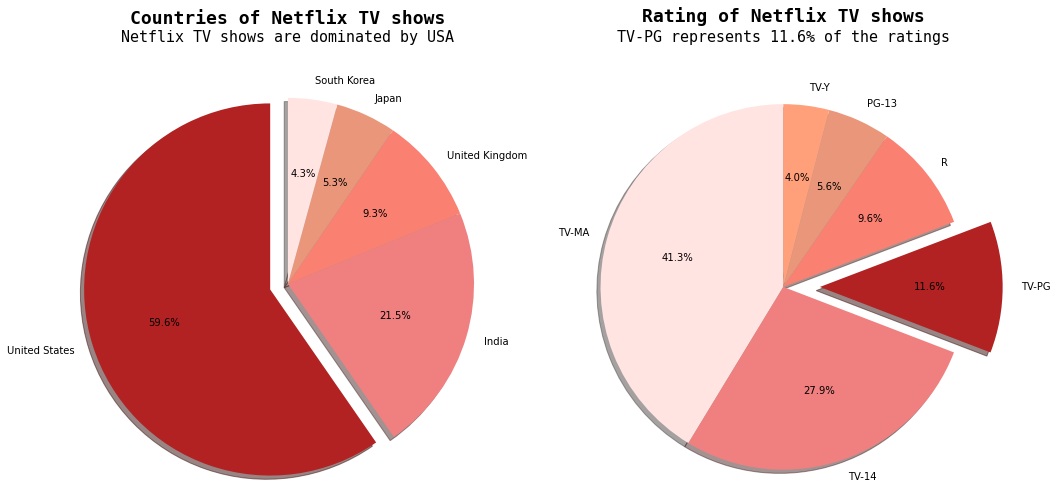

In [6]:
country=netflix.country.value_counts()[:5].reset_index()
country.columns=['countries','count']
rating=netflix.rating.value_counts()[:6].reset_index()
rating.columns=['ratings','count']

fig=plt.figure(figsize=(15,7),facecolor='white')
gs=fig.add_gridspec(1,2)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

colormap1=['firebrick','LightCoral','Salmon','DarkSalmon','mistyrose']
colormap2=['mistyrose','LightCoral','firebrick','Salmon','DarkSalmon','LightSalmon']

ax0.text(-0,1.4,"Countries of Netflix TV shows",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(-0,1.3,"Netflix TV shows are dominated by USA",fontsize=15,fontweight='light', fontfamily='monospace',ha='center')
ax1.text(-0,1.45,"Rating of Netflix TV shows",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')
ax1.text(-0,1.34,"TV-PG represents 11.6% of the ratings",fontsize=15,fontweight='light', fontfamily='monospace',ha='center')

ax0.pie(country['count'], explode=[0.1,0,0,0,0],labels=country.countries, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap1)

ax1.pie(rating['count'], explode=[0,0,0.2,0,0,0],labels=rating.ratings, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap2)

ax0.axis('equal')
ax1.axis('equal')
plt.tight_layout()
plt.show()

<a id="2.3"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Plot a general overview of data</h3>

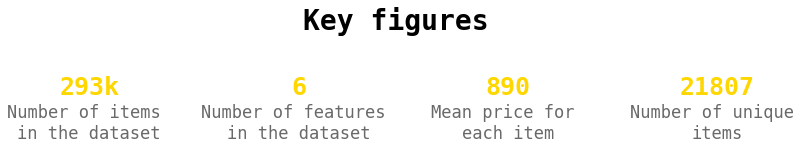

In [7]:
# inspiration code: https://www.kaggle.com/dwin183287/covid-19-world-vaccination
fig=plt.figure(figsize=(5,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.1,1,"Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"293k",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.001,"Number of items \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.75,0.4,"6",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.001,"Number of features \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"890",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.001,"Mean price for \neach item",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"21807",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.001,"Number of unique \nitems",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

<a id="2.4"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Transform numerical variables into categorical variables</h3>

In [8]:
def age_cat(age):
    
    if age >= 0 and age < 10:
        return '0-10'
    if age >= 10 and age < 20:
        return '10-20'
    if age >= 20 and age < 30:
        return '20-30'
    if age >= 30 and age < 40:
        return '30-40'
    if age >= 40 and age < 50:
        return '40-50'
    if age >= 50 and age < 60:
        return '50-60'
    if age >= 60 and age < 70:
        return '60-70'
    if age >= 70 and age < 80:
        return '70-80'
    if age >= 80 and age < 120:
        return '80+'

titanic['Age_cat']=titanic.Age.apply(lambda x: age_cat(x))
titanic=titanic.dropna()
titanic=titanic.sort_values('Age')

Text(0, 0.5, '')

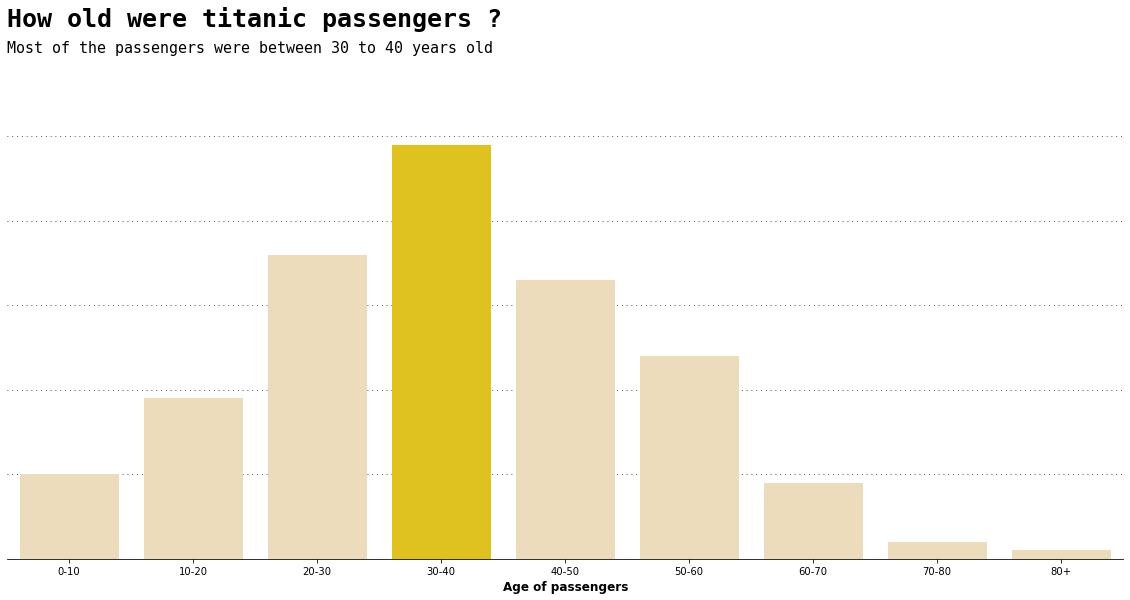

In [9]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,1)

ax=[None]
ax[0]=fig.add_subplot(gs[0,0])

ax[0].text(-0.5, 63, 
         'How old were titanic passengers ?', 
         fontsize=25, 
         fontweight='bold', 
         fontfamily='monospace'
        )

ax[0].text(-0.5, 60, 
         'Most of the passengers were between 30 to 40 years old', 
         fontsize=15, 
         fontweight='light', 
         fontfamily='monospace'
        )

ax[0].grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


colormap = ["wheat" for _ in range(9)]
colormap[3] = "gold"

sns.countplot(data=titanic,x='Age_cat',ax=ax[0],palette=colormap,alpha=1,zorder=2)


for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    
    
ax[0].set_xlabel('Age of passengers',fontsize=12, fontweight='bold')

ax[0].set_yticklabels([])
ax[0].tick_params(axis='y',length=0)
ax[0].set_ylabel('',)

<a id="2.5"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Relationship between two continuous variables</h3>

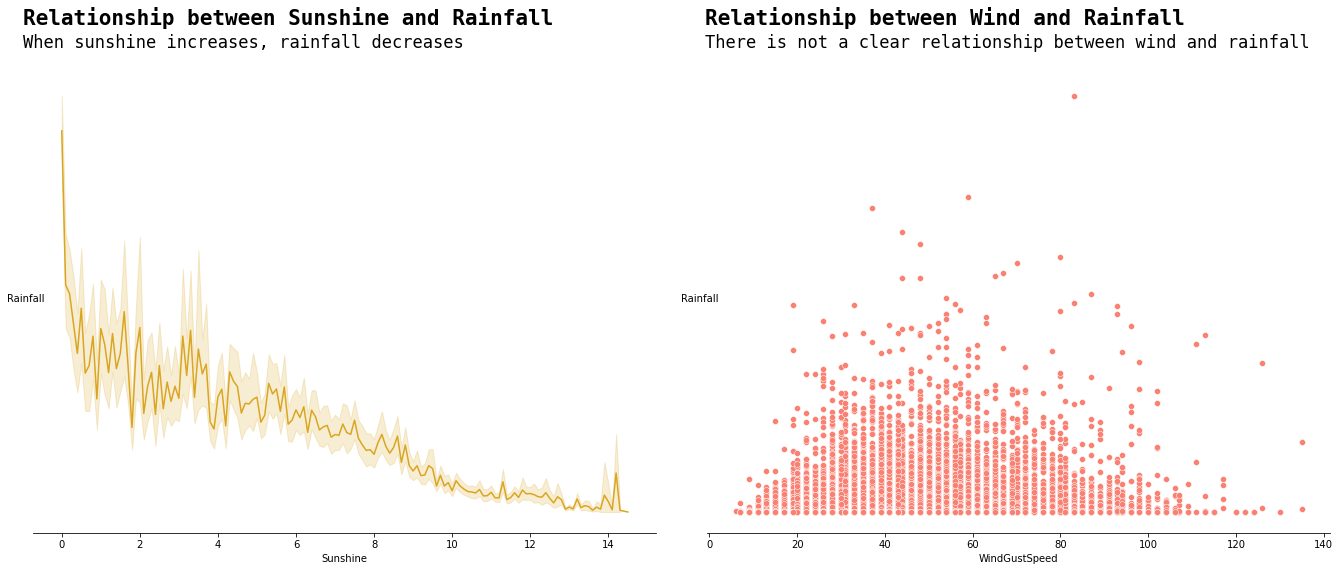

In [10]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Sunshine and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-1,14.3,"When sunshine increases, rainfall decreases",fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(-1,430,"Relationship between Wind and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-1,410,"There is not a clear relationship between wind and rainfall",fontsize=17,fontweight='light', fontfamily='monospace')

sns.lineplot(data=rain,x='Sunshine',y='Rainfall',ax=ax[0],color='goldenrod')
sns.scatterplot(data=rain,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='salmon')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<a id="2.6"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Relationship between two categorical variables and one continuous variable<h3>

In [11]:
ngo=hr[hr.company_type=='NGO'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
ngo.at[0,'training_hours']=ngo.at[0,'training_hours']*1
early=hr[hr.company_type=='Early Stage Startup'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
pvt=hr[hr.company_type=='Pvt Ltd'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
pvt.at[5,'training_hours']=pvt.at[5,'training_hours']*3
funded=hr[hr.company_type=='Funded Startup'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
public=hr[hr.company_type=='Public Sector'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
public.at[2,'training_hours']=public.at[2,'training_hours']*6
other=hr[hr.company_type=='Other'].groupby(['major_discipline']).training_hours.agg('mean').reset_index()
other.at[0,'training_hours']=10

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


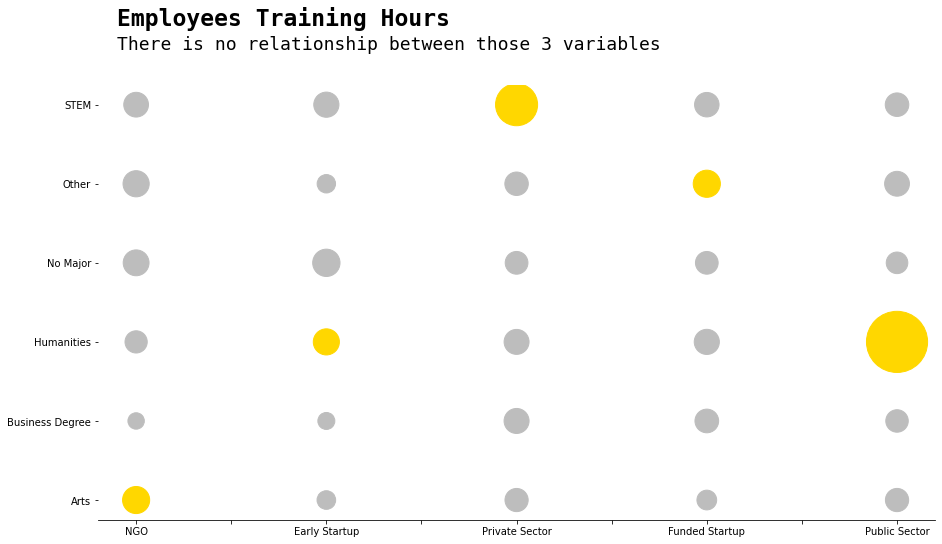

In [12]:
# inspiration: https://www.kaggle.com/dwin183287/kagglers-seen-by-continents
color_map1 = ["#bdbdbd" for _ in range(6)]

fig=plt.figure(figsize=(15,8),facecolor='white')
ax0=fig.add_subplot(1,1,1)

ngo_color = ["#bdbdbd" for _ in range(6)]
ngo_color[0]='gold'
early_color = ["#bdbdbd" for _ in range(6)]
early_color[2]='gold'
pvt_color = ["#bdbdbd" for _ in range(6)]
pvt_color[5]='gold'
funded_color = ["#bdbdbd" for _ in range(6)]
funded_color[4]='gold'
public_color = ["#bdbdbd" for _ in range(6)]
public_color[2]='gold'
other_color = ["#bdbdbd" for _ in range(6)]
other_color[3]='gold'

ax0.text(-0.1,6,"Employees Training Hours",fontsize=23,fontweight="bold",fontfamily='monospace')
ax0.text(-0.1,5.70,"There is no relationship between those 3 variables",fontsize=18,fontweight="light",fontfamily='monospace')

ax0.set_yticklabels(["","Arts", "Business Degree", "Humanities", "No Major","Other",'STEM'])
ax0.set_xticklabels(["","NGO", "","Early Startup","", "Private Sector","", "Funded Startup","","Public Sector"])

ax0.scatter([0 for _ in range(6)], np.arange(0,6), color=ngo_color, s=ngo.training_hours*9)
ax0.scatter([1 for _ in range(6)], np.arange(0,6), color=early_color, s=early.training_hours*9)
ax0.scatter([2 for _ in range(6)], np.arange(0,6), color=pvt_color, s=pvt.training_hours*9)
ax0.scatter([3 for _ in range(6)], np.arange(0,6), color=funded_color, s=funded.training_hours*9)
ax0.scatter([4 for _ in range(6)], np.arange(0,6), color=public_color, s=public.training_hours*9)


for direction in ["top","right","left"]:
    ax0.spines[direction].set_visible(False)

<a id="2.7"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Relationship between continuous variables and one categorical variable<h3>

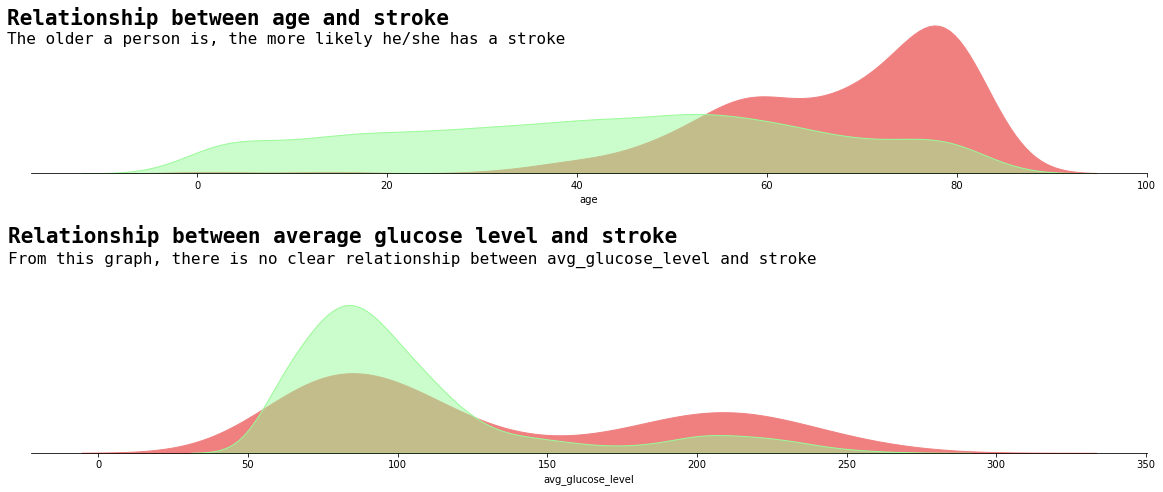

In [13]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df[df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)


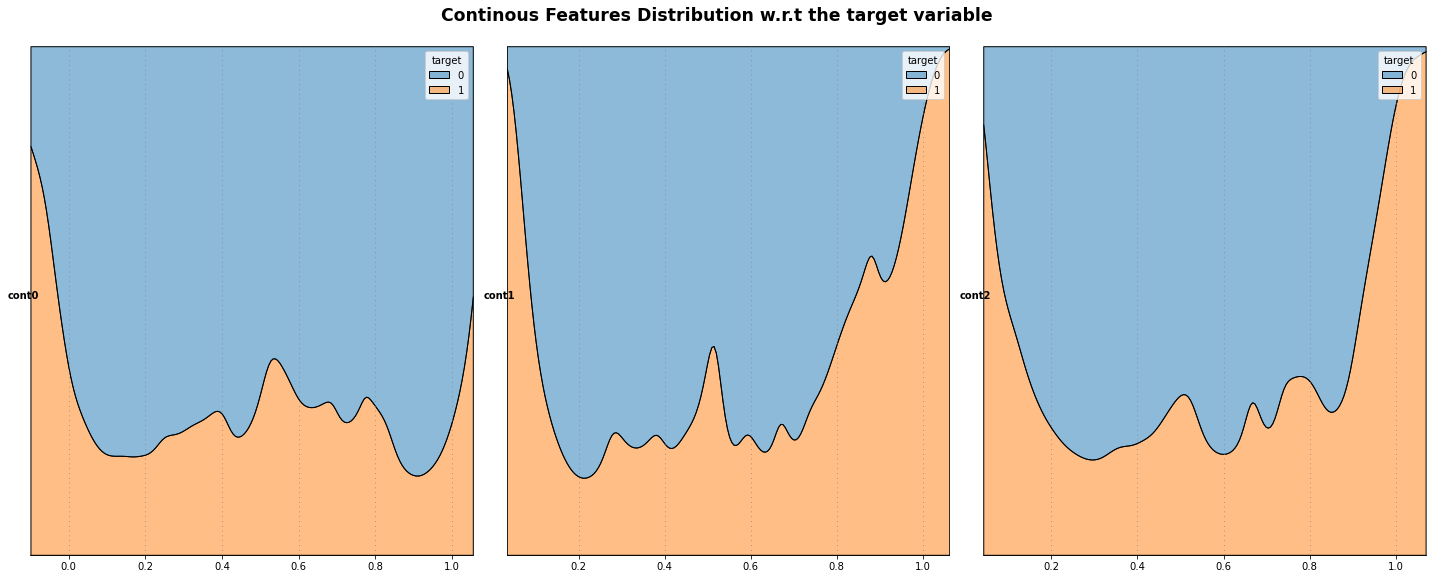

In [14]:
fig=plt.figure(figsize=(20,8),facecolor='white')

fig.suptitle('Continous Features Distribution w.r.t the target variable',x=0.5,y=1, fontsize="xx-large",fontweight="bold")

for plot in range(1,4):
    
    locals()["ax"+str(plot)]=fig.add_subplot(1,3,plot)
    locals()["ax"+str(plot)].set_facecolor('white')
    locals()["ax"+str(plot)].set_yticklabels([])
    locals()["ax"+str(plot)].tick_params(axis='y',which='both',length=0)
    
    for direction in ["top","right", 'left']:
        locals()["ax"+str(plot)].spines[direction].set_visible(False)
    
i=1   
for cont in ['cont0','cont1','cont2']:
    
    sns.kdeplot(tabular[cont],ax=locals()["ax"+str(i)],shade=True,  alpha=0.5, multiple="fill",hue='target',data=tabular)
    locals()["ax"+str(i)].grid(which='both', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    locals()["ax"+str(i)].set_ylabel(cont, fontsize=10, fontweight='bold').set_rotation(0)
    locals()["ax"+str(i)].set_xlabel('')
    i+=1
    
plt.tight_layout()
plt.show()

<a id="2.8"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">How to display correlation between variables</h3>

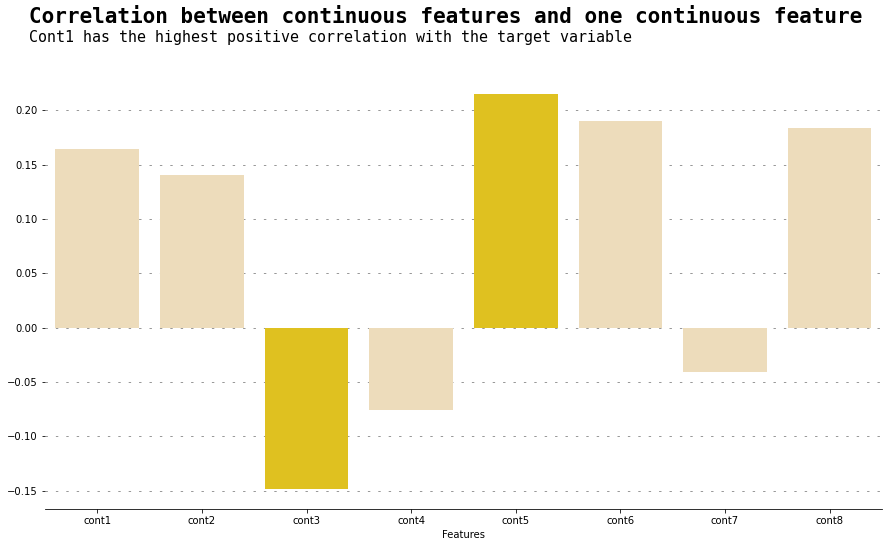

In [15]:
fig=plt.figure(figsize=(15,8),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.grid(axis='y', zorder=0, color='gray', linestyle=':', dashes=(3,10))
ax0.text(-0.65,0.28,'Correlation between continuous features and one continuous feature',fontsize=21,fontweight='bold', fontfamily='monospace')
ax0.text(-0.65,0.263,'Cont1 has the highest positive correlation with the target variable',fontsize=15,fontweight='light', fontfamily='monospace')

corr=tabular[['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8']].corrwith(tabular.target).reset_index()
corr.columns=['feature','correlation']

palette=['wheat' for i in range(8)]
palette[2]='gold'
palette[4]='gold'
sns.barplot(x='feature',y='correlation',data=corr,palette=palette,zorder=3)

ax0.set_ylabel('')
ax0.set_xlabel('Features')

for direction in ['top','right','left']:
    
    ax0.spines[direction].set_visible(False)

<a id="3"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Non usual plots</h1>


<a id="3.1"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">3D plots</h3>

In [16]:
fig = px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
              color='Species')
fig.show()

<a id="3.2"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Geographical plots</h3>

In [17]:
fig = px.choropleth(health, locations="Country",
                    color="Obesity", 
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

<a id="4"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">References</h1>

To finish this notebook, I just wanted to highlights two amazing notebooks about data visualizations:

* https://www.kaggle.com/dwin183287/kagglers-seen-by-continents
* https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips
* https://www.kaggle.com/dwin183287/covid-19-world-vaccination

I really appreciate their work. If you still did not check these notebooks, my best advice is to check them: you will learn a lot.


[Back to table of content](#table)

If you like the notebook, upvote ! :)